In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv("Nipah_Virus_dataset_File/cleaned_data.csv")
df.head()

,Unnamed: 0,age,gender,temperature,oxygen_level,heart_rate,days_sick,fever,headache,cough,...,breathing_problem,body_pain,confusion_sleepy,fits,contact_patient,outbreak_visit,bat_or_fruit_contact,date_sap_drink,pig_or_bat_contact,nipah_result
0,0,35,other,37.40,96.0,85.00,4.0,no,no,yes,...,no,no,no,no,no,no,no,no,no,1
1,1,52,female,37.70,95.0,90.00,4.0,yes,yes,yes,...,no,no,no,no,no,no,no,no,no,0
2,2,13,female,37.30,99.0,89.16,4.0,no,no,no,...,no,no,yes,no,no,yes,no,no,no,0
3,3,16,other,37.87,95.0,75.00,4.0,no,no,no,...,no,no,no,no,no,no,no,no,no,0
4,4,60,other,39.00,88.0,96.00,6.0,yes,no,no,...,yes,yes,no,no,no,yes,no,no,no,1


In [22]:
#check there is any null values or not.
df.isna().sum()

Unnamed: 0              0
age                     0
gender                  0
temperature             0
oxygen_level            0
heart_rate              0
days_sick               0
fever                   0
headache                0
cough                   0
throat_pain             0
vomiting                0
breathing_problem       0
body_pain               0
confusion_sleepy        0
fits                    0
contact_patient         0
outbreak_visit          0
bat_or_fruit_contact    0
date_sap_drink          0
pig_or_bat_contact      0
nipah_result            0
dtype: int64

In [ ]:
#Remove one unwanted column.
df.drop(columns=["Unnamed: 0"],inplace=True)

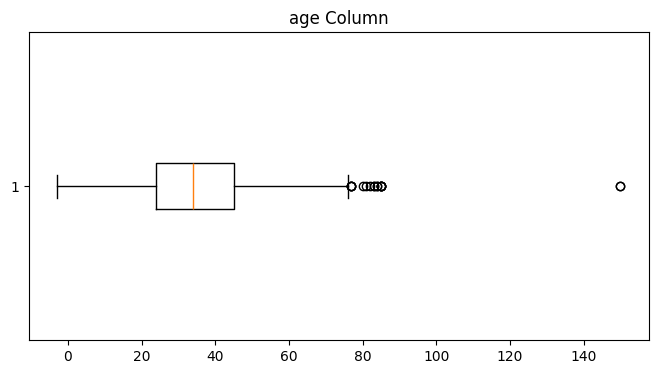

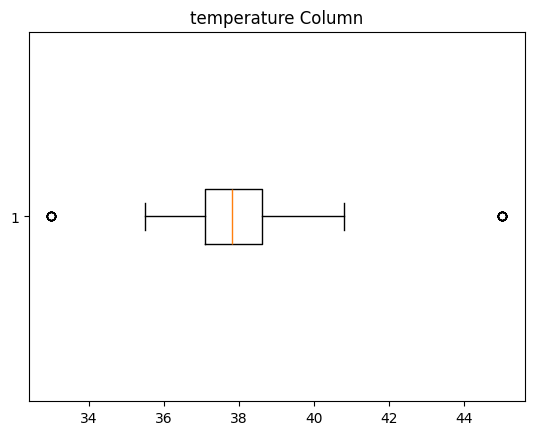

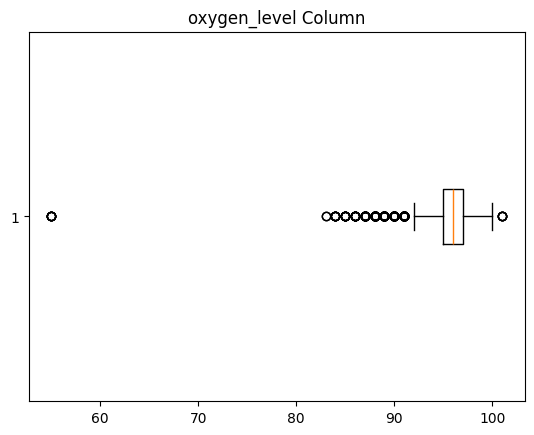

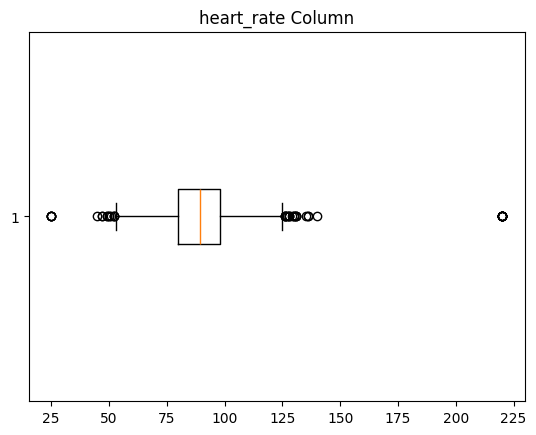

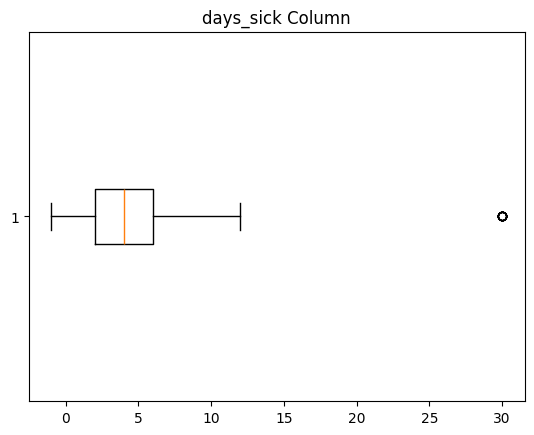

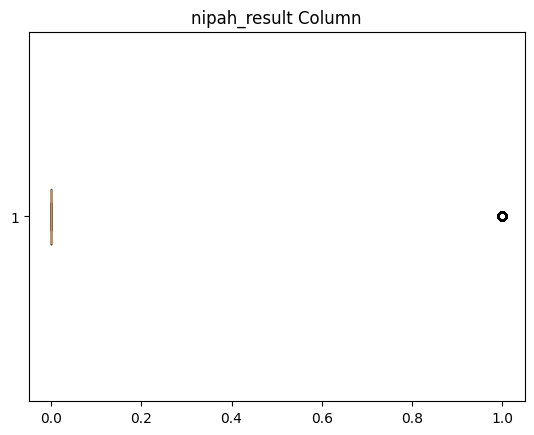

In [46]:
#Lets check there is have any OutLier or not.

#make one list of the all the columns.
column_list = ['age','temperature', 'oxygen_level', 'heart_rate',
       'days_sick','nipah_result']

plt.figure(figsize=(8,4))
for i in column_list:
    plt.boxplot(df[i], vert=False)
    plt.title(f"{i} Column")
    plt.savefig(f"OutLiers_graphs/Before_ourliers/{i}_outliers.png",dpi=100,bbox_inches='tight')
    plt.show()

In [42]:
#Lets remove the OutLiers from this datasets.
#We are use the IQR method for this.

column_list_for_outliers = ['age','temperature', 'oxygen_level', 'heart_rate']

for i in column_list_for_outliers:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    IQR = q3-q1

    min_range = q1 - (1.5*IQR)
    max_range = q3 + (1.5*IQR)

    new_dataset = [(df[i] >= min_range) & (df[i] <= max_range)]
    

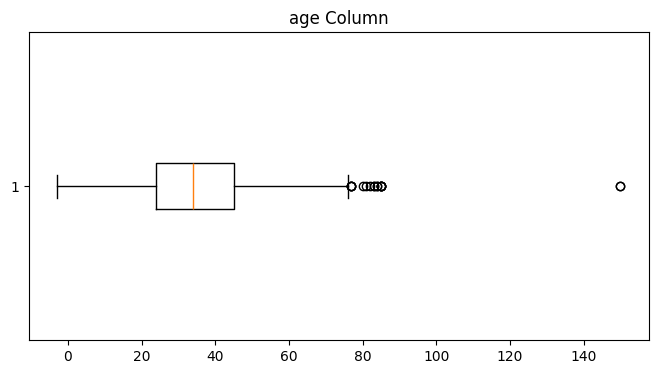

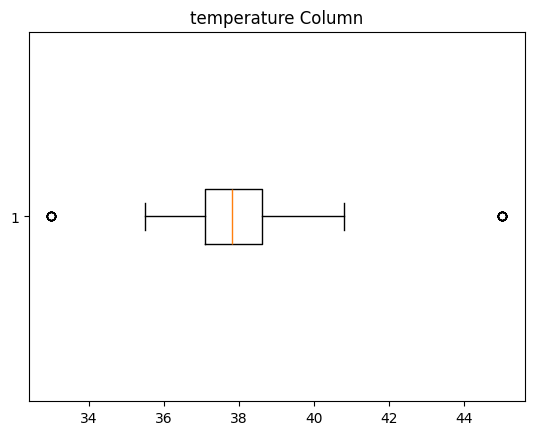

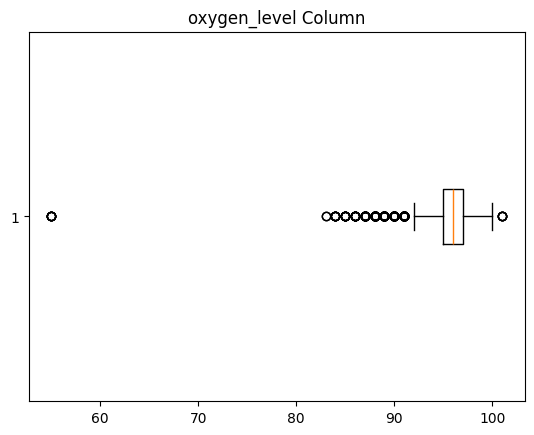

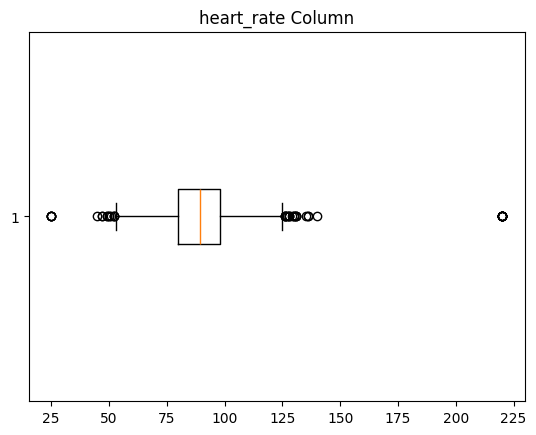

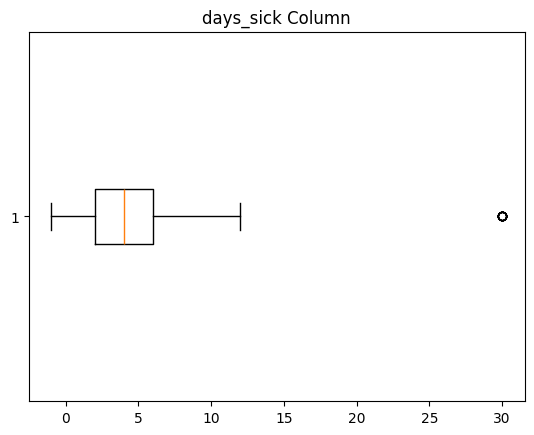

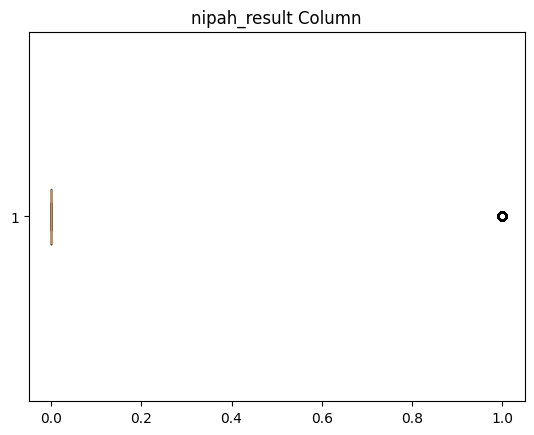

In [47]:
#Lets Recheck the OutLiers of the all the columns.

column_list = ['age','temperature', 'oxygen_level', 'heart_rate',
       'days_sick','nipah_result']

plt.figure(figsize=(8,4))
for i in column_list:
    plt.boxplot(df[i], vert=False)
    plt.title(f"{i} Column")
    plt.savefig(f"OutLiers_graphs/After_emoving_Outliers/{i}_removed_outliers.png",dpi=100,bbox_inches='tight')
    plt.show()